In [7]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2024-01-12 03:19:36--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-01-12 03:19:36--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-01-12 03:19:37--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [9]:
print(pca.components_.shape)

(50, 10000)


In [10]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio =1):
  n = len(arr) #n은 샘플 개수
  rows = int(np.ceil(n/10)) #한 줄에 10개씩 이미지 그림. 샘플 개수를 10으로 나누어 전체 행 개수 구함
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze= False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap = 'gray_r')
      axs[i, j].axis('off')
  plt.show()



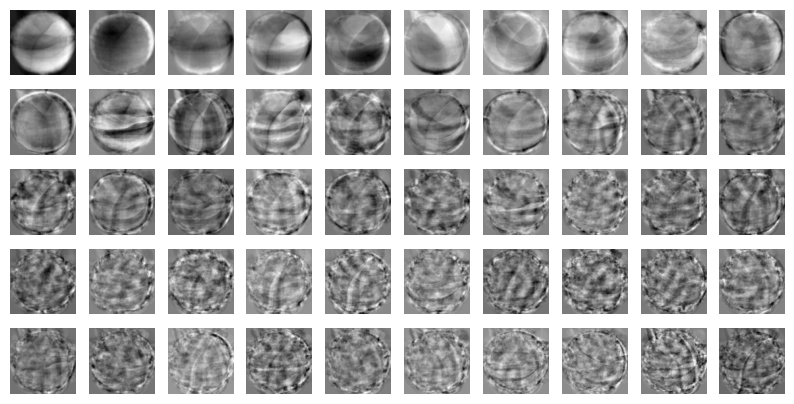

In [11]:
draw_fruits(pca.components_.reshape(-1, 100,100))

In [12]:
print(fruits_2d.shape)

(300, 10000)


In [13]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [14]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


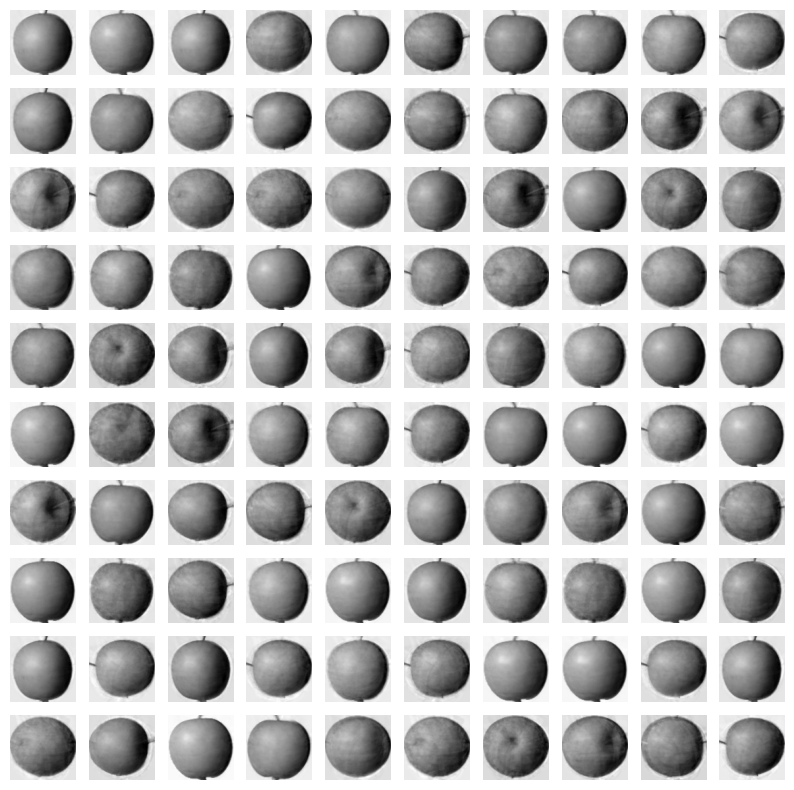

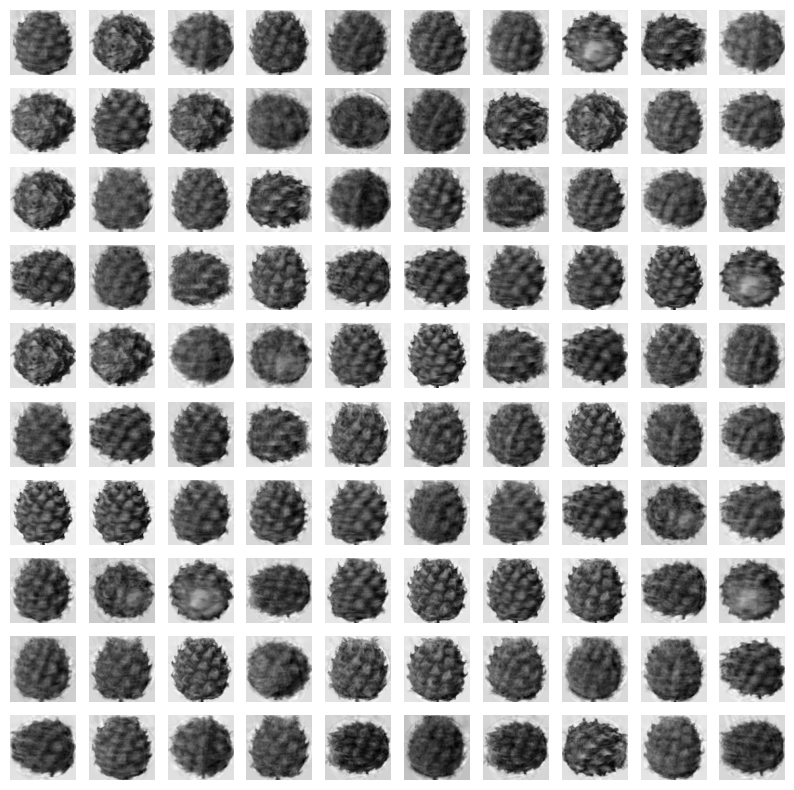

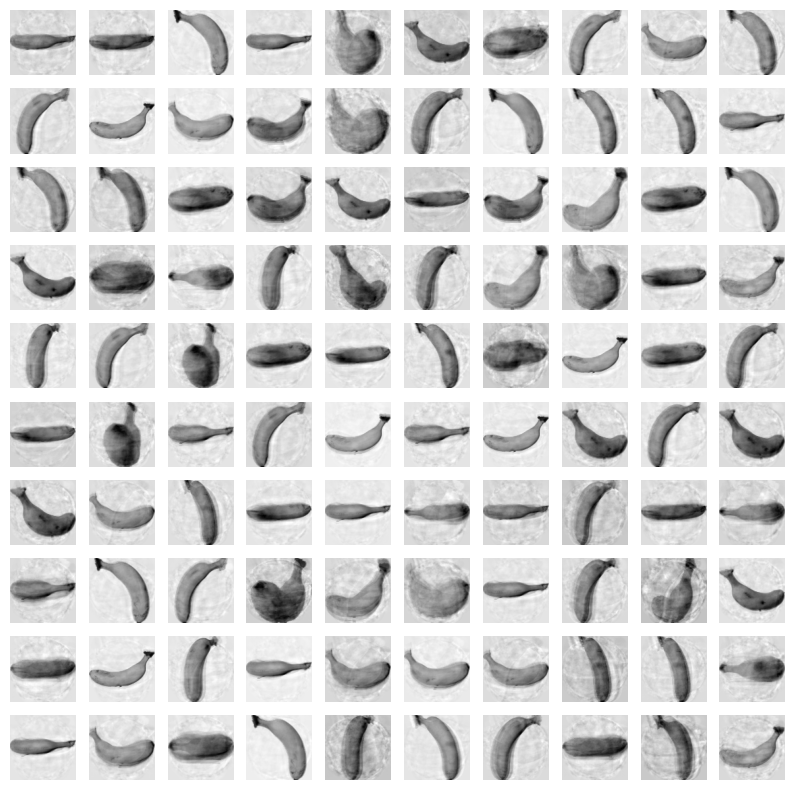

In [15]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [16]:
print(np.sum(pca.explained_variance_ratio_))

0.921456013364542


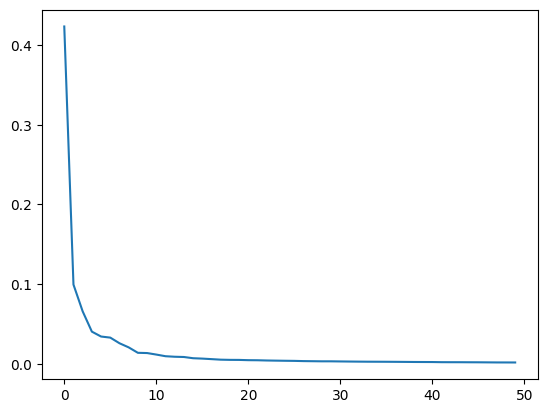

In [17]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [20]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [21]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.9090620040893556


In [22]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.02381291389465332


In [23]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [25]:
print(pca.n_components_)

2


In [26]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [28]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9933333333333334
0.07439150810241699


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


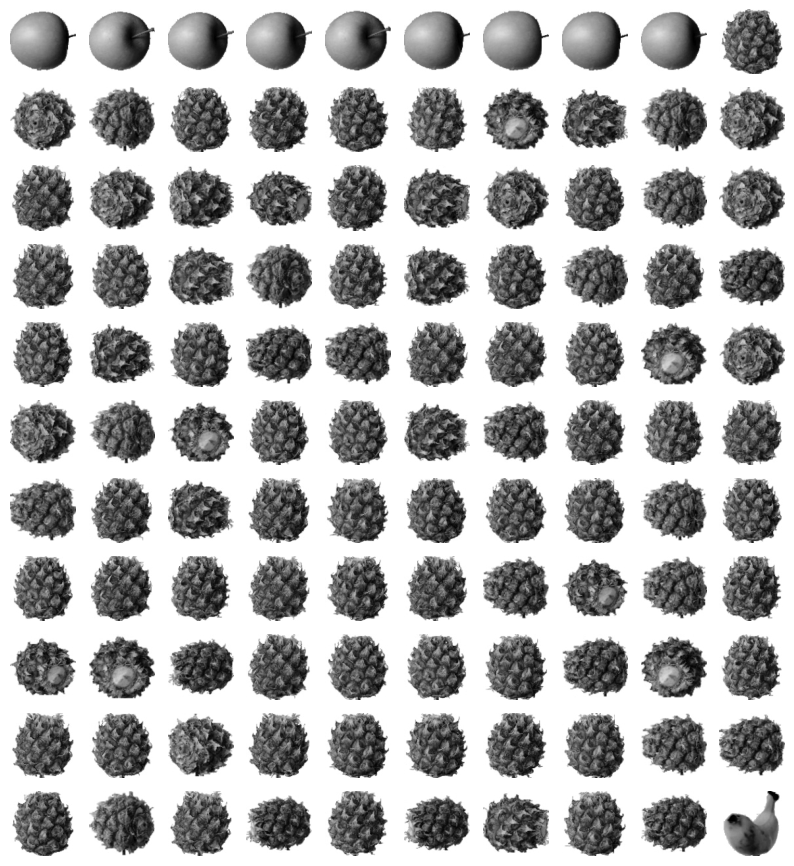

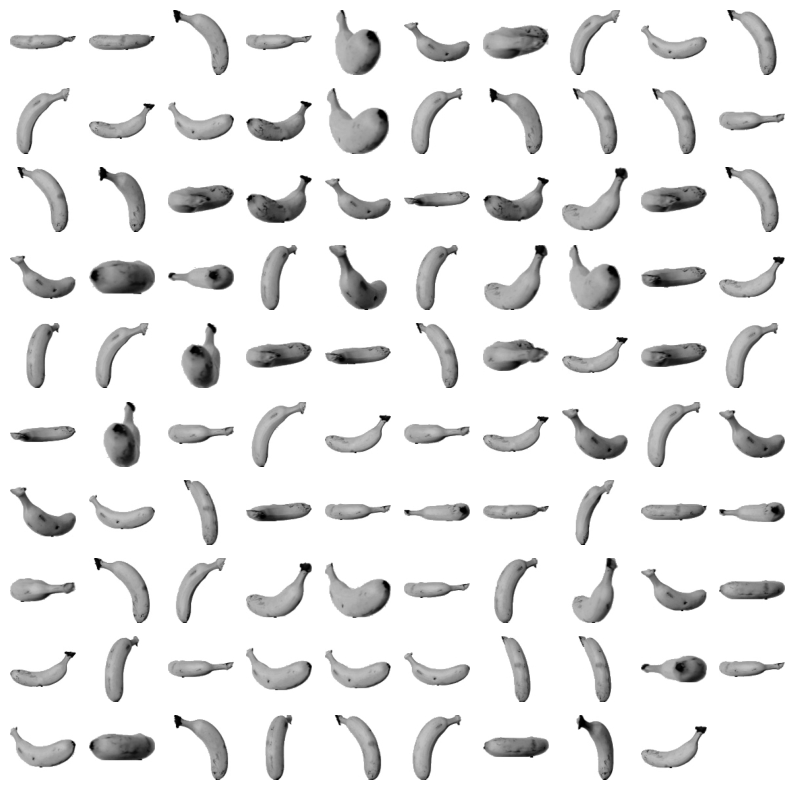

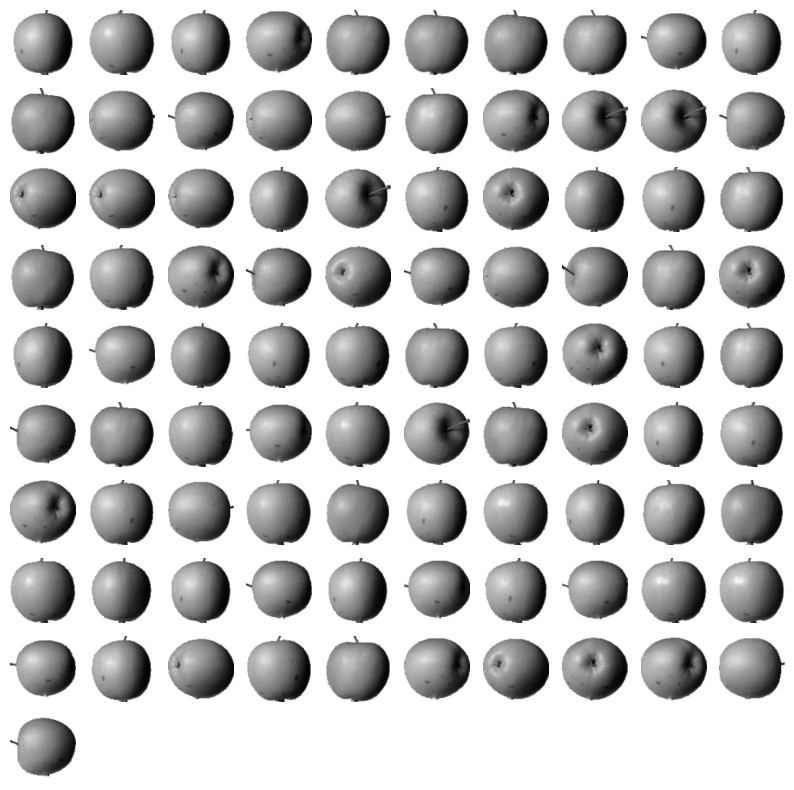

In [30]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print("\n")

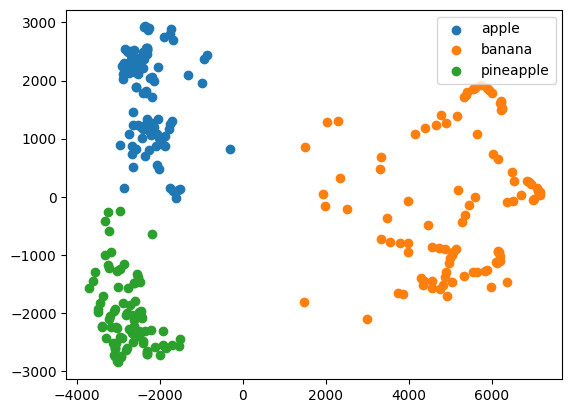

In [31]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()